In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
ti=pd.read_csv('titanic.csv')
ti.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"1""Braund","Mr. Owen Harris""",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Braund, Mr. Owen Harris",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
ti.shape

(891, 12)

## checking for missing value

In [4]:
ti.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Handling missing value by replacing the missing Age with the Mean

In [5]:
ti['Age'].mean()

29.69911764705882

In [6]:
ti['Age'].fillna(ti['Age'].mean(),inplace=True)

#### since embarked is only 2 missing value it was replaced with  most frequent value(mode)

In [7]:
ti['Embarked'].fillna(ti['Embarked'].mode()[0],inplace=True)

In [8]:
ti.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

## Removing the missing value in cabin 

In [9]:
ti.dropna(inplace=True)

In [10]:
ti.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [11]:
ti.shape

(204, 12)

#### New features

In [12]:
ti['FamilySize']=ti['SibSp']+ti['Parch']+1

In [13]:
ti.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
1,2,1,"1""Braund","Mr. Owen Harris""",female,38.0,1,0,PC 17599,71.2833,C85,C,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,3
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,1


## EDA

#### By SEX

In [14]:
ti.groupby('Sex')['Survived'].value_counts().unstack()

Survived,0,1
Sex,,
female,6,91
male,62,45


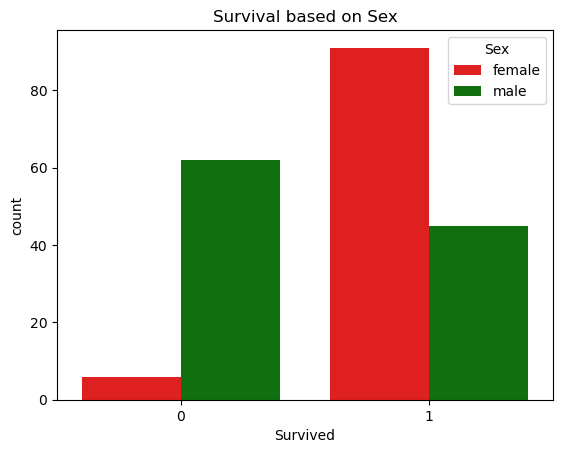

In [15]:
sns.countplot(x='Survived',hue='Sex',palette=['red','green'],data=ti)
plt.title('Survival based on Sex')
plt.show()

In [16]:
ti['Sex']=ti['Sex'].map({'male':1,'female':0})

In [17]:
ti=pd.get_dummies(ti)
ti.head(2)

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,FamilySize,Pclass_1,"Pclass_1""Braund",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
1,2,1,0,38.0,1,0,71.2833,2,False,True,...,False,False,False,False,False,False,False,True,False,False
3,4,1,0,35.0,1,0,53.1000,2,True,False,...,False,False,False,False,False,False,False,False,False,True


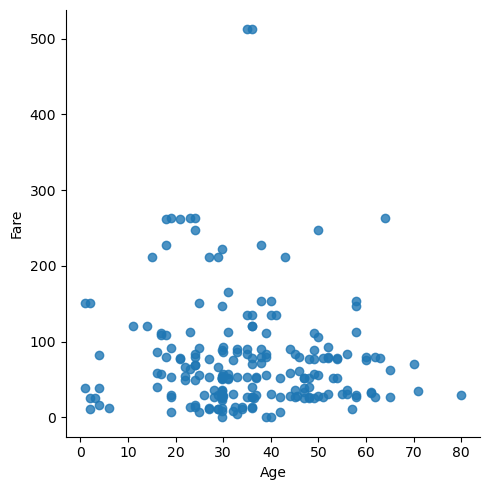

In [18]:
sns.lmplot(data=ti,x='Age',y='Fare',fit_reg=False)

# ModelBuilding

In [19]:
# PREPROCESSING DATA

X = ti.drop('Survived', axis=1)
y = ti['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X.head()
X.shape

(204, 507)

In [20]:
# MULTIPLE SELECTION OF MODELS FROM THE GIVEN QUESTION

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

In [21]:
# TRAINING THE MODELS

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"{name} Performance:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")
    print()


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Performance:
Accuracy: 0.88
Precision: 0.88
Recall: 0.97
F1-score: 0.92

Decision Tree Performance:
Accuracy: 0.80
Precision: 0.82
Recall: 0.93
F1-score: 0.87

Random Forest Performance:
Accuracy: 0.85
Precision: 0.83
Recall: 1.00
F1-score: 0.91



In [22]:
#SELECTING THE BEST-PERFORMING MODEL

best_model_name = max(models, key=lambda x: models[x].score(X_test, y_test))
best_model = models[best_model_name]

print(f"The Best-performing model in this Task is {best_model_name}")

The Best-performing model in this Task is Logistic Regression
